https://nbviewer.jupyter.org/github/microsoft/recommenders/blob/master/notebooks/00_quick_start/sar_movielens.ipynb

In [5]:
import pandas as pd
import numpy as np
import re
pd.set_option('display.max_columns', 25)

df = pd.read_csv(os.path.join("..","..","data","TA_User_Reviws_Korea_all_new_df.csv"))
df.head()

,userID,rating,location.locationId,location.name,location.placeType,location.reviewSummary.count,location.reviewSummary.rating,location.reviewSummary.locationId,tripInfo.stayDate,userProfile.hometown.location.name
0,0,4,306130,Lotte Hotel Seoul,ACCOMMODATION,4033.0,4.5,306130.0,2016-02-29,Jakarta
1,0,2,6352819,VIP TRAVEL,ATTRACTION,276.0,4.5,6352819.0,2016-02-29,Jakarta
2,1,5,9033360,Haagen Dazs,EATERY,10.0,4.5,9033360.0,2015-08-31,Seoul
3,1,5,9017499,Gongcha,EATERY,8.0,4.0,9017499.0,2015-11-30,Seoul
4,1,5,4076062,Mr. Pizza Terminal,EATERY,7.0,4.0,4076062.0,2015-06-30,Seoul


In [6]:
ratings = pd.DataFrame(df.groupby('location.name')['rating'].mean())
ratings.head()

,rating
location.name,
1 Q 84Chyureoseu,3.0
10 Butcher's,3.5
10 Corso Como Cafe,4.2
10000LAB X Namib,5.0
10000Lab Coffee,5.0


In [8]:
# 각 장소의 평가 수
ratings['number_of_ratings'] = df.groupby('location.name')['rating'].count()
ratings.head()

,rating,number_of_ratings
location.name,,
1 Q 84Chyureoseu,3.0,2
10 Butcher's,3.5,2
10 Corso Como Cafe,4.2,5
10000LAB X Namib,5.0,1
10000Lab Coffee,5.0,1


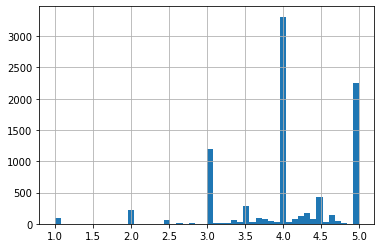

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings['rating'].hist(bins=50)

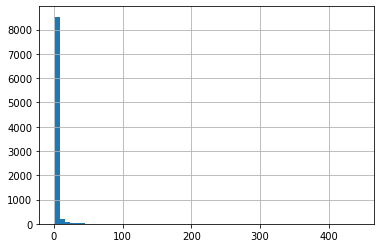

In [10]:
ratings['number_of_ratings'].hist(bins=60)

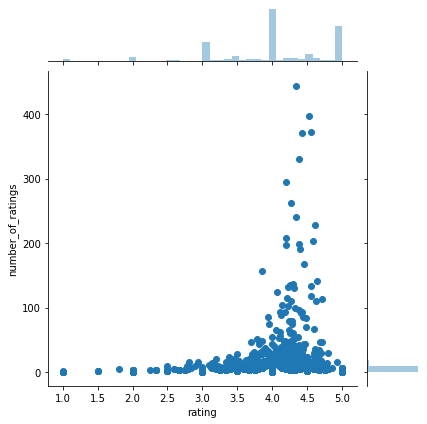

In [11]:
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)

도표에서 우리는 그들이 장소의 평균 평가율과 평가 사이의 긍정적인 관계임을 알 수 있다. 그래프는 장소가 더 많은 평점을 받을수록 평균 평점이 더 높다는 것을 나타낸다. 특히 장소당 평가율 수 임계값을 선택할 때 유의해야 한다.

간단한 아이템 기반 추천자 시스템  
이를 위해 우리는 데이터 집합을 영화 제목이 컬럼으로, user_id가 인덱스로, 등급이 값으로 있는 매트릭스로 변환해야 한다. 
이를 통해 열을 동영상 제목으로, 행을 사용자 ID로 하는 데이터 프레임을 얻을 수 있다. 각 열은 모든 사용자의 영화 등급을 나타낸다.   
등급은 사용자가 특정 영화를 평가하지 않은 NAN으로 나타난다. 우리는 이 매트릭스를 이용하여 한 편의 영화와 매트릭스의 나머지 영화의 등급 간의 상관관계를 계산한다.   
우리는 영화 매트릭스를 만들기 위해 판다 pivot_table 유틸리티를 사용한다.


In [12]:
movie_place = df.pivot_table(index='userID', columns='location.locationId', values='rating')
movie_place.head()

location.locationId,299151,299152,299154,299502,299504,299506,299533,299536,299537,299538,299776,301253,...,20374044,20374059,20374064,20376450,20381818,20381822,20381827,20403351,20483591,20494843,20860800,20903295
userID,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
location.name,,
Myeongdong Shopping Street,4.337838,444
Lotte Hotel Seoul,4.531486,397
Seoul Metro,4.554960,373
Gyeongbokgung Palace,4.421622,370
The Westin Chosun Seoul,4.386707,331
N Seoul Tower,4.193220,295
Millennium Hilton Seoul,4.263359,262
"THE PLAZA Seoul, Autograph Collection",4.345833,240
Four Seasons Hotel Seoul,4.618421,228


In [3]:
COLUMNS = ['userID', 'location.locationId', 'rating', 'tripInfo.stayDate']
df = df.loc[:,COLUMNS]
df.head()

,userID,location.locationId,rating,tripInfo.stayDate
0,0,306130,4,2016-02-29
1,0,6352819,2,2016-02-29
2,1,9033360,5,2015-08-31
3,1,9017499,5,2015-11-30
4,1,4076062,5,2015-06-30


In [127]:
# ! pip install papermill

In [128]:
# set the environment path to find Recommenders
import sys
sys.path.append("../../")

import itertools
import logging
import os

import numpy as np
import pandas as pd
import papermill as pm

from reco_utils.dataset.python_splitters import python_random_split
from reco_utils.evaluation.python_evaluation import map_at_k, ndcg_at_k, precision_at_k, recall_at_k
from reco_utils.recommender.sar.sar_singlenode import SARSingleNode

In [129]:
# top k items to recommend
TOP_K = 10

In [130]:
# Convert the float precision to 32-bit in order to reduce memory consumption 
df.loc[:, 'rating'] = df['rating'].astype(np.float64)
df.head()

,userID,rating,location.locationId,location.name,location.placeType,location.reviewSummary.count,location.reviewSummary.rating,location.reviewSummary.locationId,tripInfo.stayDate,userProfile.hometown.location.name
0,0,4.0,306130,Lotte Hotel Seoul,ACCOMMODATION,4033.0,4.5,306130.0,2016-02-29,Jakarta
1,0,2.0,6352819,VIP TRAVEL,ATTRACTION,276.0,4.5,6352819.0,2016-02-29,Jakarta
2,1,5.0,9033360,Haagen Dazs,EATERY,10.0,4.5,9033360.0,2015-08-31,Seoul
3,1,5.0,9017499,Gongcha,EATERY,8.0,4.0,9017499.0,2015-11-30,Seoul
4,1,5.0,4076062,Mr. Pizza Terminal,EATERY,7.0,4.0,4076062.0,2015-06-30,Seoul


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28561 entries, 0 to 28560
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   userID                              28561 non-null  int64  
 1   rating                              28561 non-null  float64
 2   location.locationId                 28561 non-null  int64  
 3   location.name                       28561 non-null  object 
 4   location.placeType                  28561 non-null  object 
 5   location.reviewSummary.count        28561 non-null  float64
 6   location.reviewSummary.rating       28561 non-null  float64
 7   location.reviewSummary.locationId   28561 non-null  float64
 8   tripInfo.stayDate                   28561 non-null  object 
 9   userProfile.hometown.location.name  28561 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 2.2+ MB


In [132]:
# import datetime

# def convert_date(str_date):
#   return datetime.datetime.strptime(str_date, "%Y-%m-%d")

# df['stayDate'] = df['stayDate'].apply(convert_date)
# print(df.info())

In [134]:
def clean(date):
  return date.replace('-','')

df['stayDate'] = df['tripInfo.stayDate'].apply(clean)
df.head()

,userID,rating,location.locationId,location.name,location.placeType,location.reviewSummary.count,location.reviewSummary.rating,location.reviewSummary.locationId,tripInfo.stayDate,userProfile.hometown.location.name,stayDate
0,0,4.0,306130,Lotte Hotel Seoul,ACCOMMODATION,4033.0,4.5,306130.0,2016-02-29,Jakarta,20160229
1,0,2.0,6352819,VIP TRAVEL,ATTRACTION,276.0,4.5,6352819.0,2016-02-29,Jakarta,20160229
2,1,5.0,9033360,Haagen Dazs,EATERY,10.0,4.5,9033360.0,2015-08-31,Seoul,20150831
3,1,5.0,9017499,Gongcha,EATERY,8.0,4.0,9017499.0,2015-11-30,Seoul,20151130
4,1,5.0,4076062,Mr. Pizza Terminal,EATERY,7.0,4.0,4076062.0,2015-06-30,Seoul,20150630


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28561 entries, 0 to 28560
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   userID                              28561 non-null  int64  
 1   rating                              28561 non-null  float64
 2   location.locationId                 28561 non-null  int64  
 3   location.name                       28561 non-null  object 
 4   location.placeType                  28561 non-null  object 
 5   location.reviewSummary.count        28561 non-null  float64
 6   location.reviewSummary.rating       28561 non-null  float64
 7   location.reviewSummary.locationId   28561 non-null  float64
 8   tripInfo.stayDate                   28561 non-null  object 
 9   userProfile.hometown.location.name  28561 non-null  object 
 10  stayDate                            28561 non-null  object 
dtypes: float64(4), int64(2), object(5)
memory

In [136]:
df['stayDate'] = df['stayDate'].astype('int')

In [137]:
df.head()

,userID,rating,location.locationId,location.name,location.placeType,location.reviewSummary.count,location.reviewSummary.rating,location.reviewSummary.locationId,tripInfo.stayDate,userProfile.hometown.location.name,stayDate
0,0,4.0,306130,Lotte Hotel Seoul,ACCOMMODATION,4033.0,4.5,306130.0,2016-02-29,Jakarta,20160229
1,0,2.0,6352819,VIP TRAVEL,ATTRACTION,276.0,4.5,6352819.0,2016-02-29,Jakarta,20160229
2,1,5.0,9033360,Haagen Dazs,EATERY,10.0,4.5,9033360.0,2015-08-31,Seoul,20150831
3,1,5.0,9017499,Gongcha,EATERY,8.0,4.0,9017499.0,2015-11-30,Seoul,20151130
4,1,5.0,4076062,Mr. Pizza Terminal,EATERY,7.0,4.0,4076062.0,2015-06-30,Seoul,20150630


In [147]:
dff = df.groupby('userID')['userID'].agg([('user_count','count')]).reset_index()
one_user = dff.loc[dff['user_count']==1]['userID']

df_one = df.loc[df.userID.isin(one_user.values)]
df_more = df.loc[~df.userID.isin(one_user.values)]

from sklearn.model_selection import train_test_split
train, test = train_test_split(df_more,
                                   stratify=df_more['userID'], 
                                   test_size=0.20, 
                                   random_state=42)

print('# interactions on Train set: %d' % len(train))
print('# interactions on Test set: %d' % len(test))

train = pd.concat([train, df_one])

print('# interactions on Train set: %d' % len(train))
print('# interactions on Test set: %d' % len(test))

# interactions on Train set: 21213
# interactions on Test set: 5304
# interactions on Train set: 23257
# interactions on Test set: 5304


In [148]:
header = {
    "col_user": "userID",
    "col_item": "location.locationId",
    "col_rating": "rating",
    "col_timestamp": "stayDate",
    "col_prediction": "Prediction",
}

In [149]:
# set log level to INFO
logging.basicConfig(level=logging.DEBUG, 
                    format='%(asctime)s %(levelname)-8s %(message)s')

model = SARSingleNode(
    similarity_type="jaccard", 
    time_decay_coefficient=30, 
    time_now=None, 
    timedecay_formula=True, 
    **header
)

In [150]:
model.fit(train)

2020-05-28 15:47:59,357 INFO     Collecting user affinity matrix
2020-05-28 15:47:59,366 INFO     Calculating time-decayed affinities
2020-05-28 15:47:59,384 INFO     Creating index columns
2020-05-28 15:47:59,428 INFO     Building user affinity sparse matrix
2020-05-28 15:47:59,431 INFO     Calculating item co-occurrence
2020-05-28 15:47:59,629 INFO     Calculating item similarity
2020-05-28 15:47:59,629 INFO     Using jaccard based similarity
2020-05-28 15:48:04,145 INFO     Done training


In [151]:
top_k = model.recommend_k_items(test, remove_seen=True)

2020-05-28 15:48:04,156 INFO     Calculating recommendation scores
2020-05-28 15:48:04,378 INFO     Removing seen items


In [152]:
top_k.shape

(17980, 3)

In [155]:
top_k_with_titles = (top_k.join(df[['location.locationId', 'location.name']].drop_duplicates().set_index('location.locationId'), 
                                on='location.locationId', 
                                how='inner').sort_values(by=['userID', 'Prediction'], ascending=False))
display(top_k_with_titles.head(10))

,userID,location.locationId,Prediction,location.name
17780,4552,8910512,0.442038,Bee
17781,4552,8532286,0.442038,Menya Sandaime Sinnonhyeon Station
17782,4552,10000516,0.442038,Fireman
17783,4552,3479249,0.442038,Itaewon Backpackers
17784,4552,8317064,0.442038,Philstay - Ehwa Boutique
17785,4552,8428751,0.397834,The BS Hotel
17786,4552,5287781,0.284167,Tongin Market
17787,4552,8798065,0.248646,Lotte World Aquarium
17788,4552,4798715,0.142084,Yeouido Hangang Park
17789,4552,3136736,0.132611,Petite France


## Evaluate the results  
항목 유사도 행렬 S와 사용자 선호도 행렬 A가 행렬 곱으로생성된 추천 점수는 movielens 데이터 세트의 원래 명시적 등급과 동일한 축을 가져야 합니다.  
즉, SAR 알고리즘은 사용자 - 항목 쌍에 대한 명시적 등급을 “예측하는 것”이 아니라 관련되는 항목을 사용자에게 “추천하는 작업”을 의미합니다.  
RMSE와 같은 평가 지표보다 precision@k, recall@k 등과 같은 순위측정 기준은 SAR 알고리즘을 평가하는 데 더 적합합니다.  
다음은reco_utils에 제공된 평가 함수를 사용하여 SAR 모델을 평가하는 방법을 보여줍니다.

In [156]:
# all ranking metrics have the same arguments
args = [test, top_k]
kwargs = dict(col_user='userID', 
              col_item='location.locationId', 
              col_rating='rating', 
              col_prediction='Prediction', 
              relevancy_method='top_k', 
              k=TOP_K)

eval_map = map_at_k(*args, **kwargs)
eval_ndcg = ndcg_at_k(*args, **kwargs)
eval_precision = precision_at_k(*args, **kwargs)
eval_recall = recall_at_k(*args, **kwargs)

In [159]:
top_k.head()

,userID,location.locationId,Prediction
0,753,2483961,4.203345
1,753,1579821,3.467556
2,753,1379963,3.427432
3,753,2194168,3.406720
4,753,324907,3.339731


In [162]:
print({TOP_K},{eval_map},{eval_ndcg},{eval_precision},{eval_recall}, sep='\n')

{10}
{0.06093628612149911}
{0.08934030910372265}
{0.024805339265850945}
{0.1444946911611553}


In [163]:
top_k

,userID,location.locationId,Prediction
0,753,2483961,4.203345
1,753,1579821,3.467556
2,753,1379963,3.427432
3,753,2194168,3.406720
4,753,324907,3.339731
...,...,...,...
17975,3733,554582,0.371512
17976,3733,1962594,0.347135
17977,3733,324907,0.338727
17978,3733,12518697,0.331031


In [165]:
top_k.head(11)

,userID,location.locationId,Prediction
0,753,2483961,4.203345
1,753,1579821,3.467556
2,753,1379963,3.427432
3,753,2194168,3.406720
4,753,324907,3.339731
5,753,6656879,3.145964
6,753,1046419,2.999210
7,753,6671988,2.990323
8,753,554582,2.982233
9,753,324890,2.944048


사용자별 top10개(개수는 지정 파라미터) 추천 목록 나옴.